# 1. Basic Function

In [1]:
import numpy as np

In [2]:
print("Running warmUpExercise ...")

Running warmUpExercise ...


In [3]:
print("5x5 Identity Matrix: ")

5x5 Identity Matrix: 


In [4]:
def warmUpExercise():
    A = np.identity(5)
    return A

In [5]:
A = warmUpExercise()

In [6]:
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2. Linear Regression With One Variable

## 2.1 Plotting the Data 

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('ex1data1.txt', header=None, names=['The Number of Population', 'Profit'])

In [9]:
data.head()

,The Number of Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
data.describe()

,The Number of Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [11]:
data.shape

(97, 2)

In [12]:
X = data.iloc[:, :-1].values

In [13]:
y = data.iloc[:, -1:].values

In [14]:
X

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6

In [15]:
y

array([[17.592  ],
       [ 9.1302 ],
       [13.662  ],
       [11.854  ],
       [ 6.8233 ],
       [11.886  ],
       [ 4.3483 ],
       [12.     ],
       [ 6.5987 ],
       [ 3.8166 ],
       [ 3.2522 ],
       [15.505  ],
       [ 3.1551 ],
       [ 7.2258 ],
       [ 0.71618],
       [ 3.5129 ],
       [ 5.3048 ],
       [ 0.56077],
       [ 3.6518 ],
       [ 5.3893 ],
       [ 3.1386 ],
       [21.767  ],
       [ 4.263  ],
       [ 5.1875 ],
       [ 3.0825 ],
       [22.638  ],
       [13.501  ],
       [ 7.0467 ],
       [14.692  ],
       [24.147  ],
       [-1.22   ],
       [ 5.9966 ],
       [12.134  ],
       [ 1.8495 ],
       [ 6.5426 ],
       [ 4.5623 ],
       [ 4.1164 ],
       [ 3.3928 ],
       [10.117  ],
       [ 5.4974 ],
       [ 0.55657],
       [ 3.9115 ],
       [ 5.3854 ],
       [ 2.4406 ],
       [ 6.7318 ],
       [ 1.0463 ],
       [ 5.1337 ],
       [ 1.844  ],
       [ 8.0043 ],
       [ 1.0179 ],
       [ 6.7504 ],
       [ 1.8396 ],
       [ 4.2

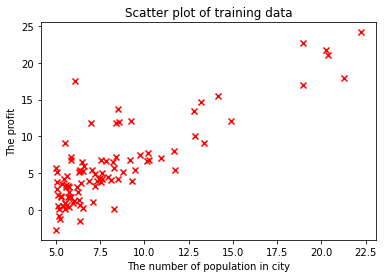

In [16]:
#plotting
import matplotlib.pyplot as plt

plt.scatter(X, y, c='red', marker='x')
plt.xlabel('The number of population in city')
plt.ylabel('The profit')
plt.title('Scatter plot of training data')
plt.show()

## 2.2 Gradient Descent 

### Cost Function 

In [17]:
def computeCost(X, y, theta):
    m = len(y)
    J = 0
    
    hypothesis = np.dot(X, theta)
    J = 1/(2*m) * np.sum(np.square(hypothesis - y))
    return J

### Gradient Descent Function

In [18]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(1, num_iters+1):
        #calculate error
        error = np.dot(X, theta) - y
        #calculate theta
        theta = theta - (alpha / m) * np.dot(X.transpose(),error)
        
        #calculate cost function
        J_history[iter-1] = computeCost(X, y, theta)
        
        if (iter == (num_iters*10/100)) | (iter == (num_iters*20/100)) | (iter == (num_iters*30/100)) | (iter == (num_iters*40/100)) | (iter == (num_iters*50/100)) | (iter == (num_iters*60/100)) | (iter == (num_iters*70/100)) | (iter == (num_iters*80/100)) | (iter == (num_iters*90/100)) | (iter == (num_iters*100/100)):
            print('---------------------------------------------------------')
            print('Gradient Descent is running: ', int((iter * 100) / num_iters),'%')
            print('Cost: ', J_history[iter-1])
            print('Theta', theta)
            print('---------------------------------------------------------')
            
    return theta, J_history

### Initialize Theta 

In [19]:
theta = np.zeros((2, 1))

In [20]:
theta

array([[0.],
       [0.]])

### Add a column of ones to X 

In [21]:
ones = np.ones((97, 1))

In [22]:
X = np.append(ones, X, axis=1)

In [23]:
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [24]:
X.shape

(97, 2)

### Some gradient descent settings 

In [25]:
iterations = 1500
alpha = 0.01

### Computing the cost J(θ)

In [26]:
#Compute and display initial cost
J = computeCost(X, y, theta)
print('With theta = [0; 0]\nCost computed = ', J);
print('Expected cost value (approx) 32.07')

With theta = [0; 0]
Cost computed =  32.072733877455676
Expected cost value (approx) 32.07


In [27]:
#Compute and display initial cost
J = computeCost(X, y, np.array([[-1], [2]]))
print('With theta = [-1; 2]\nCost computed = ', J);
print('Expected cost value (approx) 54.24')

With theta = [-1; 2]
Cost computed =  54.24245508201238
Expected cost value (approx) 54.24


### Running Gradient Descent 

In [28]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

---------------------------------------------------------
Gradient Descent is running:  10 %
Cost:  [5.31439724]
Theta [[-0.86287834]
 [ 0.88834569]]
---------------------------------------------------------
---------------------------------------------------------
Gradient Descent is running:  20 %
Cost:  [4.96436205]
Theta [[-1.58199122]
 [ 0.96058838]]
---------------------------------------------------------
---------------------------------------------------------
Gradient Descent is running:  30 %
Cost:  [4.76063788]
Theta [[-2.13059966]
 [ 1.01570204]]
---------------------------------------------------------
---------------------------------------------------------
Gradient Descent is running:  40 %
Cost:  [4.64206827]
Theta [[-2.54913093]
 [ 1.05774805]]
---------------------------------------------------------
---------------------------------------------------------
Gradient Descent is running:  50 %
Cost:  [4.57305951]
Theta [[-2.86842682]
 [ 1.08982479]]
------------------

In [29]:
#Print theta to the screen
print('Theta found by Gradient Descent: ', theta)
print('Expected theta values (approx) \n-3.6303\n1.1664')

Theta found by Gradient Descent:  [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx) 
-3.6303
1.1664


## 2.3 Plot The Linear Fit 

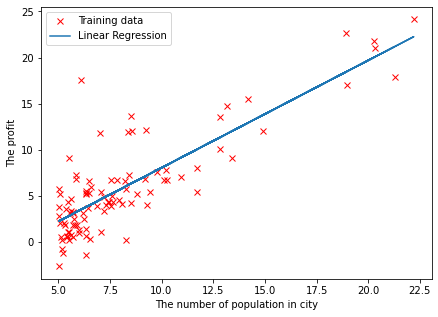

In [30]:
plt.figure(figsize=(7,5))
plt.plot(X[:, -1:], y, c='red', marker='x', linestyle='None')
plt.plot(X[:, -1:], np.dot(X, theta))
plt.xlabel('The number of population in city')
plt.ylabel('The profit')
plt.legend(['Training data','Linear Regression'])
plt.show()

### Predict values 

In [31]:
#Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of ', predict1*10000)
predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of ', predict2*10000)

For population = 35,000, we predict a profit of  [4519.7678677]
For population = 70,000, we predict a profit of  [45342.45012945]


## 2.4 Visualizing J(θ) 

In [32]:
print('Visualizing J(theta_0, theta_1) ...')

Visualizing J(theta_0, theta_1) ...


In [33]:
#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)

In [34]:
#Initialize J_vals to a matrix
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [35]:
J_vals.shape

(100, 100)

In [36]:
#Fill out J_vals
for i in range(0, len(theta0_vals)):
    for j in range(0, len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = computeCost(X, y, t)

In [37]:
J_vals

array([[328.09290555, 316.6648683 , 305.44447299, ..., 186.35412584,
        195.06735595, 203.98822799],
       [323.26504192, 311.92025945, 300.7831189 , ..., 189.60197489,
        198.39845977, 207.40258658],
       [318.47799046, 307.21646275, 296.16257698, ..., 192.89063611,
        201.77037576, 210.85775734],
       ...,
       [ 49.81156018,  46.45923561,  43.31455298, ..., 691.41691065,
        708.20585345, 725.20243817],
       [ 48.94247627,  45.67340647,  42.61197861, ..., 698.62353943,
        715.49573699, 732.57557648],
       [ 48.11420452,  44.9283895 ,  41.95021641, ..., 705.87098036,
        722.82643269, 739.98952696]])

### Surface plot

In [38]:
computeCost(X, y, np.array([[-9.8],[3.9]]))

189.74317253671958

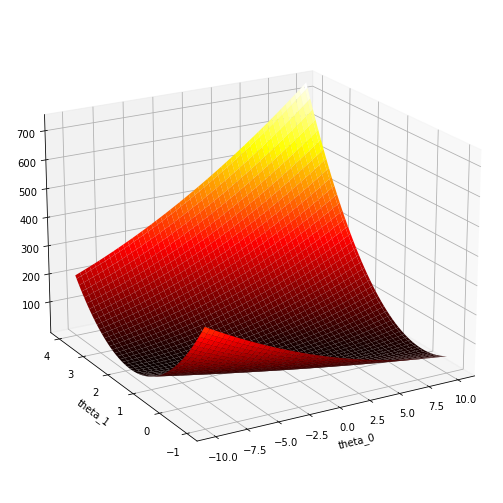

In [39]:
#Creating figure
plt.figure(figsize=(14, 9))
ax = plt.axes(projection='3d')
#creating 2-d grid
[theta0, theta1] = np.meshgrid(theta0_vals, theta1_vals)
#Creating color map
my_cmap = plt.get_cmap('hot')
#Creating plot
#use transpose J_vals, or else the axes will be flipped
ax.plot_surface(theta0, theta1, J_vals.transpose(), cmap=my_cmap)
#Adding labels
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.view_init(20, 240)
#Show plot
plt.show()

### Contour plot 

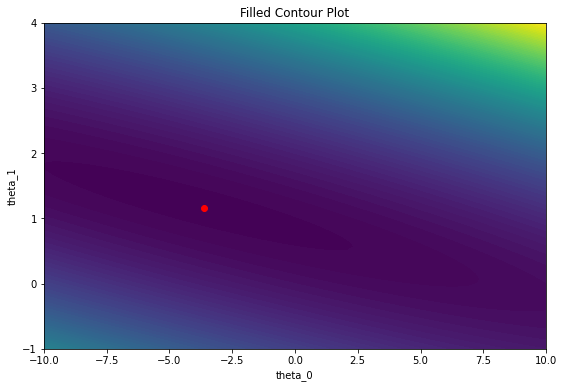

In [40]:
#Creating figure
plt.figure(figsize=(9, 6))
#creating 2-d grid
[theta0, theta1] = np.meshgrid(theta0_vals, theta1_vals)
#Creating plot
#use transpose J_vals, or else the axes will be flipped
plt.contourf(theta0, theta1, J_vals.transpose(), 100)
plt.plot(theta[0], theta[1], c='red', marker='o')
plt.title('Filled Contour Plot')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

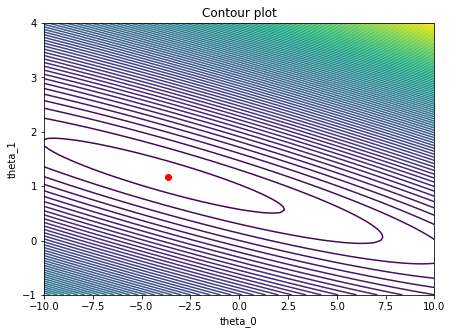

In [41]:
plt.figure(figsize=(7, 5))
#creating 2-d grid
[theta0, theta1] = np.meshgrid(theta0_vals, theta1_vals)
plt.title('Contour plot')
contour = plt.contour(theta0, theta1, J_vals.transpose(),100)
plt.plot(theta[0], theta[1], c='red', marker='o')
#plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

# 3. Linear Regression With Multiple Variables

In [42]:
#Loading dataset
data = pd.read_csv('ex1data2.txt', header=None, names=['Size of the house(square feet)', 'The number of bedrooms', 'The price of the house'])
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values

In [43]:
data.head()

,Size of the house(square feet),The number of bedrooms,The price of the house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [44]:
data.shape

(47, 3)

In [45]:
data.describe()

,Size of the house(square feet),The number of bedrooms,The price of the house
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


## 3.1 Feature Normalization 

In [46]:
def featureNormalize(X):
    # Normalized X
    X_norm = X
    # Mean value
    mu = np.zeros((1, X.shape[1]))
    # Standard deviation
    sigma = np.zeros((1, X.shape[1]))
    
    #Calculate mean value
    mu = np.mean(X, axis=0)
    #Calculate Standard deviation
    sigma = np.std(X, axis=0)
    #Calculate Normalized X
    X_norm = (X_norm - mu)/sigma
    
    return X_norm, mu, sigma

In [47]:
#Scale features and set them to zero mean
print('Normalizing Features...')
X, mu, sigma = featureNormalize(X)

Normalizing Features...


In [48]:
#Add intercept term to X
ones = np.ones((len(X), 1))
X = np.append(ones, X, axis=1)

In [49]:
X[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

## 3.2 Gradient Descent 

### Compute Cost Function with multiple variables 

In [50]:
def computeCostMulti(X, y, theta):
    m = len(y)
    J = 0
    
    hypothesis = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(hypothesis - y))
    
    return J

### Gradient Descent Function with multiple variables 

In [51]:
#Gradient Descent function
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for iter in range(1, num_iters+1):
        #Calculate error
        error = np.dot(X, theta) - y
        #Calculate theta
        theta = theta - (alpha/m) * (np.dot(X.transpose(), error))
        #calculate cost function
        J_history[iter-1] = computeCostMulti(X, y, theta)
        
        if (iter == (num_iters*10/100)) | (iter == (num_iters*20/100)) | (iter == (num_iters*30/100)) | (iter == (num_iters*40/100)) | (iter == (num_iters*50/100)) | (iter == (num_iters*60/100)) | (iter == (num_iters*70/100)) | (iter == (num_iters*80/100)) | (iter == (num_iters*90/100)) | (iter == (num_iters*100/100)):
            print('---------------------------------------------------------')
            print('Gradient Descent is running: ', int((iter * 100) / num_iters),'%')
            print('Cost: ', J_history[iter-1])
            print('Theta', theta)
            print('---------------------------------------------------------')
    return theta, J_history

In [52]:
#Choose alpha value and iterations
alpha = 0.01
num_iters = 400

In [53]:
#Init the theta and run Gradient Descent
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

---------------------------------------------------------
Gradient Descent is running:  10 %
Cost:  [3.01868171e+10]
Theta [[112686.20405955]
 [ 33392.79750195]
 [ 14629.20292217]]
---------------------------------------------------------
---------------------------------------------------------
Gradient Descent is running:  20 %
Cost:  [1.47122192e+10]
Theta [[188070.09215582]
 [ 54059.45429634]
 [ 19566.68864854]]
---------------------------------------------------------
---------------------------------------------------------
Gradient Descent is running:  30 %
Cost:  [7.84510224e+09]
Theta [[238499.78434339]
 [ 67477.93719969]
 [ 19799.70106885]]
---------------------------------------------------------
---------------------------------------------------------
Gradient Descent is running:  40 %
Cost:  [4.75539535e+09]
Theta [[272235.82421024]
 [ 76643.82386165]
 [ 17912.4539638 ]]
---------------------------------------------------------
--------------------------------------------

In [54]:
#Display Gradient Descent's result
print('Theta computed from Gradient Descent: ', theta)

Theta computed from Gradient Descent:  [[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


### Estimate the price of a 1650 sq-ft, 3 bed rooms house 

In [55]:
price = 0

In [56]:
size_of_the_house = (1650 - mu[0])/sigma[0]
number_of_bedroom = (3 - mu[1])/sigma[1]

In [57]:
new_sample = np.array([1, size_of_the_house, number_of_bedroom])
new_sample

array([ 1.        , -0.44604386, -0.22609337])

In [58]:
price = np.dot(new_sample, theta)

In [59]:
print('predicted price of the house: ', price[0])

predicted price of the house:  289221.5473712181


### Plot the convergence graph 

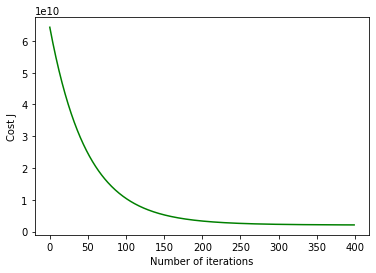

In [60]:
plt.plot(J_history, c='green')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

### 3.2.1 Optional (ungraded) exercise: Selecting learning rates 

In [61]:
theta_vals = np.zeros((3, 1))

In [62]:
alpha_vals = np.array([0.3, 0.1, 0.03, 0.01])

In [63]:
num_iters = 10000

In [64]:
def costFunction(X, y, theta_vals):
    m = len(y)
    J = 0
    #compute hypothesis
    hypothesis = np.dot(X, theta_vals)
    #compute cost
    J = (1 / (2 * m)) * np.sum(np.square(hypothesis - y))
    
    return J

In [65]:
def gradientDescentFunction(X, y, theta_vals, alpha_vals, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters))
    
    for i in range(0, num_iters):
        #compute error
        error = np.dot(X, theta_vals) - y
        #compute theta
        theta_vals = theta_vals - (alpha_vals/m) * np.dot(X.transpose(), error)
        #compute cost
        J_history[i] = costFunction(X, y, theta_vals)
    
    return theta_vals, J_history

In [66]:
J_vals = np.zeros((len(alpha_vals), num_iters))

In [67]:
for i in range(0, len(alpha_vals)):
    print(alpha_vals[i])
    theta_vals, J_vals[i] = gradientDescentFunction(X, y, theta_vals, alpha_vals[i], num_iters)
    print(theta_vals)
    theta_vals = np.zeros((3, 1))

0.3
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
0.1
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
0.03
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
0.01
[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]


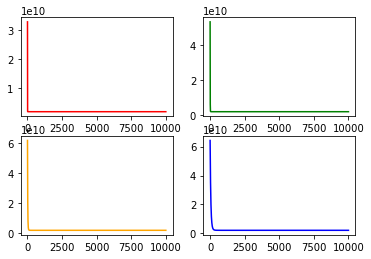

In [68]:
figure, axis = plt.subplots(2,2)

axis[0, 0].plot(J_vals[0], c='red')

axis[0, 1].plot(J_vals[1], c='green')

axis[1, 0].plot(J_vals[2], c='orange')

axis[1, 1].plot(J_vals[3], c='blue')

plt.show()

## 3.3 Normal Equations 

In [69]:
#load data
data = pd.read_csv('ex1data2.txt', header=None, names=['Size of the house(square feet)', 'The number of bedrooms', 'The price of the house'])

In [70]:
data.head()

,Size of the house(square feet),The number of bedrooms,The price of the house
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [71]:
data.shape

(47, 3)

In [72]:
X = data.iloc[:,:-1].values

In [73]:
y = data.iloc[:,-1:].values

### Add intercept term to X 

In [74]:
ones = np.ones((47, 1))
X = np.append(ones, X, axis=1)

In [75]:
X.shape

(47, 3)

### Normal Equations Function 

In [76]:
def normalEquations(X, y):
    theta_NE = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), y)
    return theta_NE

In [77]:
theta_NE = normalEquations(X, y)

In [78]:
theta_NE

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [79]:
price = 0

In [80]:
new_sample = np.array([1, 1650, 3])
new_sample

array([   1, 1650,    3])

In [81]:
price = np.dot(new_sample, theta_NE)

In [82]:
print('predicted price of the house: ', price[0])

predicted price of the house:  293081.46433489426
